ABC Limited company sells various products to its customers. Many customers of the company are wholesalers. 
Now the company has recorded all the transactions over a period of 1 year (dataset is attached with the use case). 
As a Machine learning Engineer, you must segment the customers in different groups so that the marketing team 
can push the right offers to the corresponding customers. Solve this use case using the technologies and open 
source tools of your choice.

The solution can include and may not be limited to:

a.       Exploratory analysis of data (with some visualizations if possible)

b.      Data pre-processing

c.       Creating clusters of customers and visualizing them.

d.      Your Interpretation about each cluster.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
from textwrap import wrap

In [2]:
df = pd.read_csv('ML_Data.csv', encoding='latin1')
df.head(10)

,Invoice_Number,Product_Code,Description,Quantity,Invoice_Date,Unit_Price,Customer_ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12-01-2010 08:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12-01-2010 08:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12-01-2010 08:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12-01-2010 08:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12-01-2010 08:34,1.69,13047.0,United Kingdom


In [3]:
df.shape

(541909, 8)

In [4]:
df.tail()

,Invoice_Number,Product_Code,Description,Quantity,Invoice_Date,Unit_Price,Customer_ID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12-09-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12-09-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12-09-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12-09-2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12-09-2011 12:50,4.95,12680.0,France


In [5]:
# What are the features available and what are their data type?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Invoice_Number  541909 non-null  object 
 1   Product_Code    541909 non-null  object 
 2   Description     540455 non-null  object 
 3   Quantity        541909 non-null  int64  
 4   Invoice_Date    541909 non-null  object 
 5   Unit_Price      541909 non-null  float64
 6   Customer_ID     406829 non-null  float64
 7   Country         541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.isnull().sum()

Invoice_Number         0
Product_Code           0
Description         1454
Quantity               0
Invoice_Date           0
Unit_Price             0
Customer_ID       135080
Country                0
dtype: int64

In [7]:
print("Total number of unique customerID values =", len(df.Customer_ID.unique()))

Total number of unique customerID values = 4373


In [8]:
df[df["Customer_ID"].isnull()]

,Invoice_Number,Product_Code,Description,Quantity,Invoice_Date,Unit_Price,Customer_ID,Country
622,536414,22139,NaN,56,12-01-2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12-01-2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12-01-2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12-01-2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12-01-2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12-09-2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12-09-2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12-09-2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12-09-2011 10:26,10.79,NaN,United Kingdom


# Exploratory Data Analysis

Identify null values

In [9]:
df.columns

Index(['Invoice_Number', 'Product_Code', 'Description', 'Quantity',
       'Invoice_Date', 'Unit_Price', 'Customer_ID', 'Country'],
      dtype='object')

In [10]:
# gives some infomation on columns types and number of null values
tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
print(tab_info)

                 Invoice_Number Product_Code Description Quantity  \
column type              object       object      object    int64   
null values (nb)              0            0        1454        0   
null values (%)               0            0    0.268311        0   

                 Invoice_Date Unit_Price Customer_ID Country  
column type            object    float64     float64  object  
null values (nb)            0          0      135080       0  
null values (%)             0          0     24.9267       0  


In [11]:
df.dropna(axis = 0, subset = ['Description'], inplace = True)

In [12]:
df.shape

(540455, 8)

### in Customer_ID column nearly 25% data entries are null.
### So 25% of data aren't assigned to the any customer(s).
### We will remove these data entries.

In [13]:
df.dropna(axis = 0, subset = ['Customer_ID'], inplace = True)

In [14]:
df.shape

(406829, 8)

In [15]:
df.isnull().sum()

Invoice_Number    0
Product_Code      0
Description       0
Quantity          0
Invoice_Date      0
Unit_Price        0
Customer_ID       0
Country           0
dtype: int64

#### Data attribute : Country

In [16]:
df.columns

Index(['Invoice_Number', 'Product_Code', 'Description', 'Quantity',
       'Invoice_Date', 'Unit_Price', 'Customer_ID', 'Country'],
      dtype='object')

In [17]:
temp = df[['Customer_ID', 'Invoice_Number', 'Country']].groupby(
    ['Customer_ID', 'Invoice_Number', 'Country']).count()
temp = temp.reset_index(drop = False)
countries = temp['Country'].value_counts()
print('No. of cuntries in dataframe: {}'.format(len(countries)))

No. of cuntries in dataframe: 37


In [18]:
temp.head()

,Customer_ID,Invoice_Number,Country
0,12346.0,541431,United Kingdom
1,12346.0,C541433,United Kingdom
2,12347.0,537626,Iceland
3,12347.0,542237,Iceland
4,12347.0,549222,Iceland


In [19]:
countries.head()

United Kingdom    19857
Germany             603
France              458
EIRE                319
Belgium             119
Name: Country, dtype: int64

In [20]:
orders_per_country = df[['Customer_ID','Country']].groupby(['Country']).count()
orders_per_country = orders_per_country.reset_index(drop = False)
orders_per_country.head()

,Country,Customer_ID
0,Australia,1259
1,Austria,401
2,Bahrain,17
3,Belgium,2069
4,Brazil,32


In [21]:
print (orders_per_country.sort_values(by='Customer_ID', ascending=False).rename(index=str,
                                        columns={"Customer_ID": "Country wise number of order"}))

                 Country  Country wise number of order
35        United Kingdom                        361878
14               Germany                          9495
13                France                          8491
10                  EIRE                          7485
30                 Spain                          2533
23           Netherlands                          2371
3                Belgium                          2069
32           Switzerland                          1877
26              Portugal                          1480
0              Australia                          1259
24                Norway                          1086
18                 Italy                           803
6        Channel Islands                           758
12               Finland                           695
7                 Cyprus                           622
31                Sweden                           462
1                Austria                           401
9         

### Customers and products 

In [22]:
df.shape

(406829, 8)

In [23]:
df

,Invoice_Number,Product_Code,Description,Quantity,Invoice_Date,Unit_Price,Customer_ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12-09-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12-09-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12-09-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12-09-2011 12:50,4.15,12680.0,France


In [24]:
pd.DataFrame([{'products': len(df['Product_Code'].value_counts()),    
               'transactions': len(df['Invoice_Number'].value_counts()),
               'customers': len(df['Customer_ID'].value_counts()),  
              }], columns = ['products', 'transactions', 'customers'], 
              index = ['quantity'])

,products,transactions,customers
quantity,3684,22190,4372


### So there are 4372 users who bought 3684 different items. There are  22190 transactions which are carried out.

Checking number of products purchased in every transaction

In [25]:
products_per_transaction = df.groupby(by=['Customer_ID', 'Invoice_Number'], as_index=False)['Invoice_Date'].count()
products_per_transaction = products_per_transaction.rename(columns = {'Invoice_Date':'Number of products'})
products_per_transaction[:10].sort_values('Customer_ID')

,Customer_ID,Invoice_Number,Number of products
0,12346.0,541431,1
1,12346.0,C541433,1
2,12347.0,537626,31
3,12347.0,542237,29
4,12347.0,549222,24
5,12347.0,556201,18
6,12347.0,562032,22
7,12347.0,573511,47
8,12347.0,581180,11
9,12348.0,539318,17


Here we can see that:

There are some users purchased one item. Example: customerID 12346.

CustomerID 12347 frequently buy large number of items per order.

From the dataset we notice prefix 'C', which indicates that the particular transaction has been cancelled.

In [26]:
# cancelled orders
products_per_transaction['Order_Cancelled'] = products_per_transaction['Invoice_Number'].apply(lambda x:int('C' in x))
print(products_per_transaction[:5])

   Customer_ID Invoice_Number  Number of products  Order_Cancelled
0      12346.0         541431                   1                0
1      12346.0        C541433                   1                1
2      12347.0         537626                  31                0
3      12347.0         542237                  29                0
4      12347.0         549222                  24                0


In [27]:
# number of cancelled orders

n1 = products_per_transaction['Order_Cancelled'].sum()
print(n1)

3654


In [28]:
# Comparing with total orders

n2 = products_per_transaction.shape[0]
print(n2)
percentage = (n1/n2)*100
print('Number of orders cancelled: {}/{} ({:.2f}%) '.format(n1, n2, percentage))

22190
Number of orders cancelled: 3654/22190 (16.47%) 


In [29]:
display(df.sort_values('Customer_ID')[:5])

,Invoice_Number,Product_Code,Description,Quantity,Invoice_Date,Unit_Price,Customer_ID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,12346.0,United Kingdom
286628,562032,21578,WOODLAND DESIGN COTTON TOTE BAG,6,08-02-2011 08:48,2.25,12347.0,Iceland
72263,542237,47559B,TEA TIME OVEN GLOVE,10,1/26/2011 14:30,1.25,12347.0,Iceland
72264,542237,21154,RED RETROSPOT OVEN GLOVE,10,1/26/2011 14:30,1.25,12347.0,Iceland


From the above output, we see that if an order is canceled, we have another transactions in the dataframe, with negative Quantity. We need to check if this is true for all the entries. To do this, we will find the entries that indicate a negative quantity and check if there is systematically an order indicating the same quantity (but positive), with the same description (CustomerID, Description and UnitPrice).

In [30]:
df_check = df[df['Quantity'] < 0][['Customer_ID','Quantity',
                                                   'Product_Code','Description','Unit_Price']]
for index, col in  df_check.iterrows():
    if df[(df['Customer_ID'] == col[0]) & (df['Quantity'] == -col[1]) 
                & (df['Description'] == col[2])].shape[0] == 0: 
        print(df_check.loc[index])
        
        break

Customer_ID        14527
Quantity              -1
Product_Code           D
Description     Discount
Unit_Price          27.5
Name: 141, dtype: object


In [31]:
# We see that the above one is 'Discount' entry. So we incorporate the same condition

df_check = df[(df['Quantity'] < 0) & (df['Description'] != 'Discount')][
                                 ['Customer_ID','Quantity','Product_Code',
                                  'Description','Unit_Price']]

for index, col in  df_check.iterrows():
    if df[(df['Customer_ID'] == col[0]) & (df['Quantity'] == -col[1]) 
                & (df['Description'] == col[2])].shape[0] == 0: 
        print(index, df_check.loc[index])
        
        break

154 Customer_ID                               15311
Quantity                                     -1
Product_Code                             35004C
Description     SET OF 3 COLOURED  FLYING DUCKS
Unit_Price                                 4.65
Name: 154, dtype: object


### So cancellations do not necessarily correspond to orders that would have been made beforehand.

In [32]:
# to check if part of the command has been canceled. For the cancellations without counterparts, a few of them are probably due to the fact that the buy orders were performed before December 2010 (the point of entry of the database)

df_cleaned = df.copy(deep = True)
df_cleaned['QuantityCanceled'] = 0

entry_to_remove = [] ; doubtfull_entry = []

for index, col in  df.iterrows():
    if (col['Quantity'] > 0) or col['Description'] == 'Discount': continue        
    df_test = df[(df['Customer_ID'] == col['Customer_ID']) &
                         (df['Product_Code']  == col['Product_Code']) & 
                         (df['Invoice_Date'] < col['Invoice_Date']) & 
                         (df['Quantity']   > 0)].copy()

    # Cancelation WITHOUT counterpart
    if (df_test.shape[0] == 0): 
        doubtfull_entry.append(index)
   
    # Cancelation WITH a counterpart
    elif (df_test.shape[0] == 1): 
        index_order = df_test.index[0]
        df.loc[index_order, 'QuantityCanceled'] = -col['Quantity']
        entry_to_remove.append(index)        
   
    # Various counterparts exist in orders: we delete the last one
    elif (df_test.shape[0] > 1): 
        df_test.sort_index(axis=0 ,ascending=False, inplace = True)        
        for ind, val in df_test.iterrows():
            if val['Quantity'] < -col['Quantity']: continue
            df.loc[ind, 'QuantityCanceled'] = -col['Quantity']
            entry_to_remove.append(index) 
            break            

In the above function, I checked the two cases:

1. a cancel order exists without counterpart
2. there's at least one counterpart with the exact same quantity

In [33]:
print("entry_to_remove: {}".format(len(entry_to_remove)))
print("doubtfull_entry: {}".format(len(doubtfull_entry)))

entry_to_remove: 6361
doubtfull_entry: 2412


### Deleting the lines listed in the doubtfull_entry list correspond to the entries

In [34]:
df.drop(entry_to_remove, axis = 0, inplace = True)
df.drop(doubtfull_entry, axis = 0, inplace = True)
remaining_entries = df[(df['Quantity'] < 0) & (df['Product_Code'] != 'D')]
print("nb of entries to delete: {}".format(remaining_entries.shape[0]))
remaining_entries[:5]

nb of entries to delete: 55


,Invoice_Number,Product_Code,Description,Quantity,Invoice_Date,Unit_Price,Customer_ID,Country,QuantityCanceled
58496,C541245,85036C,ROSE 1 WICK MORRIS BOXED CANDLE,-12,1/16/2011 12:40,4.25,15535.0,United Kingdom,NaN
74274,C542413,21876,POTTERING MUG,-5,1/27/2011 17:11,1.25,16923.0,United Kingdom,NaN
77598,C542742,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,-94,1/31/2011 16:26,0.65,15358.0,United Kingdom,NaN
77599,C542744,22700,BLACK AND WHITE DOG BOWL,-10,1/31/2011 16:32,0.85,16191.0,United Kingdom,NaN
90444,C544038,22784,LANTERN CREAM GAZEBO,-4,2/15/2011 11:32,4.95,14659.0,United Kingdom,NaN


In [35]:
df.shape

(398056, 9)

In [36]:
df['QuantityCanceled'].isnull().value_counts()

True     392133
False      5923
Name: QuantityCanceled, dtype: int64

In [37]:
df["QuantityCanceled"].fillna(0, inplace = True) 

### Analysis of the StockCode
Above, it has been seen that some values of the StockCode variable indicate a particular transaction (i.e. D for _Discount_). let's check the contents of this variable by looking for the set of codes that would contain only letters:

In [38]:
df.head()

,Invoice_Number,Product_Code,Description,Quantity,Invoice_Date,Unit_Price,Customer_ID,Country,QuantityCanceled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom,0.0
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,0.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom,0.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,0.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,0.0


In [39]:
list_special_codes = df[df['Product_Code'].str.contains('^[a-zA-Z]+', regex=True)]['Product_Code'].unique()
list_special_codes

array(['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT'],
      dtype=object)

In [40]:
for code in list_special_codes:
    print("{:<15} -> {:<30}".format(code, df[df['Product_Code'] == code]['Description'].unique()[0]))

POST            -> POSTAGE                       
D               -> Discount                      
C2              -> CARRIAGE                      
M               -> Manual                        
BANK CHARGES    -> Bank Charges                  
PADS            -> PADS TO MATCH ALL CUSHIONS    
DOT             -> DOTCOM POSTAGE                


In [41]:
df['TotalPrice'] = df['Unit_Price'] * (df['Quantity'] - df['QuantityCanceled'])
df.sort_values('Customer_ID')[:5]

,Invoice_Number,Product_Code,Description,Quantity,Invoice_Date,Unit_Price,Customer_ID,Country,QuantityCanceled,TotalPrice
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom,74215.0,0.00
286637,562032,22423,REGENCY CAKESTAND 3 TIER,3,08-02-2011 08:48,12.75,12347.0,Iceland,0.0,38.25
72274,542237,84558A,3D DOG PICTURE PLAYING CARDS,12,1/26/2011 14:30,2.95,12347.0,Iceland,0.0,35.40
72273,542237,21731,RED TOADSTOOL LED NIGHT LIGHT,12,1/26/2011 14:30,1.65,12347.0,Iceland,0.0,19.80
72272,542237,22497,SET OF 2 TINS VINTAGE BATHROOM,4,1/26/2011 14:30,4.25,12347.0,Iceland,0.0,17.00


### Each entry of the dataframe indicates prizes for a single kind of product. Hence, orders are split on several lines. Now collecting all the purchases made during a single order to recover the total order prize:

In [42]:
df['Invoice_Date'] = pd.to_datetime(df['Invoice_Date'])
# sum of purchases / user & order
temp = df.groupby(by=['Customer_ID', 'Invoice_Number'], as_index=False)['TotalPrice'].sum()
basket_price = temp.rename(columns = {'TotalPrice':'Basket Price'})

# date of the order
df['InvoiceDate_int'] = df['Invoice_Date'].astype('int64')
temp = df.groupby(by=['Customer_ID', 'Invoice_Number'], as_index=False)['InvoiceDate_int'].mean()
df.drop('InvoiceDate_int', axis = 1, inplace = True)
basket_price.loc[:, 'InvoiceDate'] = pd.to_datetime(temp['InvoiceDate_int'])

# selection of significant entries
basket_price = basket_price[basket_price['Basket Price'] > 0]
basket_price.sort_values('Customer_ID')[:6]

,Customer_ID,Invoice_Number,Basket Price,InvoiceDate
1,12347.0,537626,711.79,2010-12-07 14:57:00.000001024
2,12347.0,542237,475.39,2011-01-26 14:29:59.999999744
3,12347.0,549222,636.25,2011-04-07 10:42:59.999999232
4,12347.0,556201,382.52,2011-06-09 13:01:00.000000256
5,12347.0,562032,584.91,2011-08-02 08:48:00.000000000
6,12347.0,573511,1294.32,2011-10-31 12:25:00.000001280


### In order to have a global view of the type of order performed in this dataset, we will determine how the purchases are divided according to total prizes:

In [43]:
# Purchase count
price_range = [0, 50, 100, 200, 500, 1000, 5000, 50000]
count_price = []
for i, price in enumerate(price_range):
    if i == 0: continue
    val = basket_price[(basket_price['Basket Price'] < price) &
                       (basket_price['Basket Price'] > price_range[i-1])]['Basket Price'].count()
    count_price.append(val)

count_price

[1139, 1050, 3970, 8112, 2862, 1169, 109]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


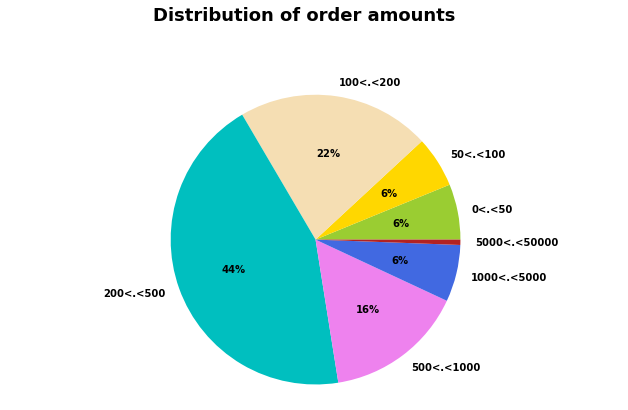

In [44]:
# Representation of the number of purchases / amount       
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(11, 6))
colors = ['yellowgreen', 'gold', 'wheat', 'c', 'violet', 'royalblue','firebrick']
labels = [ '{}<.<{}'.format(price_range[i-1], s) for i,s in enumerate(price_range) if i != 0]
sizes  = count_price
explode = [0.0 if sizes[i] < 100 else 0.0 for i in range(len(sizes))]
print(explode)
ax.pie(sizes, explode = explode, labels=labels, colors = colors,
       autopct = lambda x:'{:1.0f}%'.format(x) if x > 1 else '',
       shadow = False, startangle=0)
ax.axis('equal')
f.text(0.5, 1.01, "Distribution of order amounts", ha='center', fontsize = 18);

### Analysis of the product categories
In the data-frame, products are uniquely identified through the Product_Code variable. A short description of the products is given in the Description variable. In this section, we will use the content of this latter variable in order to group the products into different categories.

### Products Description
As a first step, extract from the Description variable the information that will prove useful. To do this, I use the following function:

In [48]:
import nltk

is_noun = lambda pos: pos[:2] == 'NN'

def keywords_inventory(dataframe, column = 'Description'):
    stemmer = nltk.stem.SnowballStemmer("english")
    keywords_roots  = {} 
    keywords_select = {}
    category_keys   = []
    count_keywords  = {}
    icount = 0
    for s in dataframe[column]:
        if pd.isnull(s): continue
        lines = s.lower()
        tokenized = nltk.word_tokenize(lines)
        nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 
        
        for t in nouns:
            t = t.lower() ; racine = stemmer.stem(t)
            if racine in keywords_roots:                
                keywords_roots[racine].add(t)
                count_keywords[racine] += 1                
            else:
                keywords_roots[racine] = {t}
                count_keywords[racine] = 1
    
    for s in keywords_roots.keys():
        if len(keywords_roots[s]) > 1:  
            min_length = 1000
            for k in keywords_roots[s]:
                if len(k) < min_length:
                    clef = k ; min_length = len(k)            
            category_keys.append(clef)
            keywords_select[s] = clef
        else:
            category_keys.append(list(keywords_roots[s])[0])
            keywords_select[s] = list(keywords_roots[s])[0]
                   
    print("number of keywords in variable '{}': {}".format(column,len(category_keys)))
    return category_keys, keywords_roots, keywords_select, count_keywords

This function takes as input the dataframe and analyzes the content of the Description column by performing the following operations:

#extract the names (proper, common) appearing in the products description
#for each name, extract the root of the word and aggregate the set of names associated with this particular root
#count the number of times each root appears in the dataframe
#when several words are listed for the same root, consider that the keyword associated with this root is the shortest name (this systematically selects the singular when there are singular/plural variants)

The first step of the analysis is to retrieve the list of products:

In [49]:
df_produits = pd.DataFrame(df['Description'].unique()).rename(columns = {0:'Description'})

In [50]:
#Once this list is created, I use the function I previously defined in order to analyze the description of the various products:

keywords, keywords_roots, keywords_select, count_keywords = keywords_inventory(df_produits)

number of keywords in variable 'Description': 1479


The execution of this function returns three variables:

#keywords: the list of extracted keywords
#keywords_roots: a dictionary where the keys are the keywords roots and the values are the lists of words associated with those roots
#count_keywords: dictionary listing the number of times every word is used


In [55]:
count_keywords

{'heart': 267,
 'holder': 120,
 'metal': 99,
 'lantern': 8,
 'cream': 46,
 'cupid': 2,
 'coat': 7,
 'hanger': 19,
 'union': 28,
 'flag': 12,
 'water': 36,
 'bottl': 44,
 'nest': 3,
 'box': 153,
 'glass': 149,
 'star': 59,
 'hand': 20,
 'jack': 21,
 'warmer': 17,
 'dot': 3,
 'bird': 45,
 'ornament': 1,
 'poppi': 7,
 'playhous': 4,
 'bedroom': 1,
 'kitchen': 20,
 'feltcraft': 24,
 'princess': 3,
 'charlott': 11,
 'doll': 11,
 'ivori': 54,
 'cosi': 6,
 'colour': 26,
 'teaspoon': 1,
 'vintag': 210,
 'jigsaw': 15,
 'block': 9,
 'alphabet': 13,
 'home': 49,
 'build': 3,
 'word': 3,
 'love': 9,
 'recip': 6,
 'england': 4,
 'jam': 18,
 'jar': 39,
 'rack': 14,
 'pari': 5,
 'fashion': 3,
 'bath': 8,
 'alarm': 7,
 'clock': 44,
 'bakelik': 4,
 'pink': 188,
 'green': 14,
 'panda': 1,
 'bunni': 25,
 'sheet': 8,
 'tape': 18,
 'globe': 1,
 'head': 3,
 'tail': 4,
 'game': 6,
 'set/2': 1,
 'retrospot': 90,
 'tea': 54,
 'towel': 22,
 'round': 28,
 'snack': 9,
 'woodland': 21,
 'spaceboy': 29,
 'lunch': 2

In [53]:
keywords

['heart',
 'holder',
 'metal',
 'lantern',
 'cream',
 'cupid',
 'coat',
 'hanger',
 'union',
 'flag',
 'water',
 'bottle',
 'nest',
 'box',
 'glass',
 'star',
 'hand',
 'jack',
 'warmer',
 'dot',
 'bird',
 'ornament',
 'poppy',
 'playhouse',
 'bedroom',
 'kitchen',
 'feltcraft',
 'princess',
 'charlotte',
 'doll',
 'ivory',
 'cosy',
 'colour',
 'teaspoons',
 'vintage',
 'jigsaw',
 'block',
 'alphabet',
 'home',
 'building',
 'word',
 'love',
 'recipe',
 'england',
 'jam',
 'jar',
 'rack',
 'paris',
 'fashion',
 'bath',
 'alarm',
 'clock',
 'bakelike',
 'pink',
 'green',
 'panda',
 'bunny',
 'sheet',
 'tape',
 'globe',
 'head',
 'tail',
 'game',
 'set/2',
 'retrospot',
 'tea',
 'towel',
 'round',
 'snack',
 'woodland',
 'spaceboy',
 'lunch',
 'i',
 'london',
 'circus',
 'bag',
 'design',
 'toadstool',
 'night',
 'light',
 'seaside',
 'puzzles',
 'mini',
 'parade',
 'paint',
 'postage',
 'paper',
 'chain',
 'christmas',
 'parasol',
 'coffee',
 'mug',
 'planet',
 'billboard',
 'love/hate'

In [54]:
keywords_roots

{'heart': {'heart', 'hearts'},
 'holder': {'holder', 'holders'},
 'metal': {'metal'},
 'lantern': {'lantern', 'lanterns'},
 'cream': {'cream'},
 'cupid': {'cupid'},
 'coat': {'coat'},
 'hanger': {'hanger', 'hangers'},
 'union': {'union'},
 'flag': {'flag', 'flags'},
 'water': {'water', 'watering'},
 'bottl': {'bottle', 'bottles'},
 'nest': {'nest', 'nesting'},
 'box': {'box', 'boxes'},
 'glass': {'glass', 'glasses'},
 'star': {'star', 'stars'},
 'hand': {'hand'},
 'jack': {'jack'},
 'warmer': {'warmer'},
 'dot': {'dot', 'dots'},
 'bird': {'bird', 'birds'},
 'ornament': {'ornament'},
 'poppi': {'poppies', 'poppy'},
 'playhous': {'playhouse'},
 'bedroom': {'bedroom'},
 'kitchen': {'kitchen'},
 'feltcraft': {'feltcraft'},
 'princess': {'princess'},
 'charlott': {'charlotte'},
 'doll': {'doll'},
 'ivori': {'ivory'},
 'cosi': {'cosy'},
 'colour': {'colour', 'colouring', 'colours'},
 'teaspoon': {'teaspoons'},
 'vintag': {'vintage'},
 'jigsaw': {'jigsaw'},
 'block': {'block', 'blocks'},
 'al

In [56]:
# converting the count_keywords dictionary into a list, to sort the keywords according to their occurrence:
list_products = []
for k,v in count_keywords.items():
    list_products.append([keywords_select[k],v])
list_products.sort(key = lambda x:x[1], reverse = True)

In [57]:
list_products

[['heart', 267],
 ['vintage', 210],
 ['set', 206],
 ['pink', 188],
 ['bag', 164],
 ['box', 153],
 ['glass', 149],
 ['christmas', 137],
 ['design', 128],
 ['candle', 121],
 ['holder', 120],
 ['flower', 120],
 ['decorative', 108],
 ['metal', 99],
 ['retrospot', 90],
 ['card', 90],
 ['necklac', 85],
 ['paper', 84],
 ['blue', 80],
 ['art', 75],
 ['silver', 72],
 ['cake', 69],
 ['polkadot', 68],
 ['cover', 68],
 ['mug', 66],
 ['tin', 66],
 ['wrap', 65],
 ['sign', 64],
 ['pack', 61],
 ['egg', 61],
 ['bracelet', 61],
 ['star', 59],
 ['bowl', 57],
 ['mini', 56],
 ['garden', 55],
 ['wall', 55],
 ['ivory', 54],
 ['tea', 54],
 ['cushion', 54],
 ['frame', 52],
 ['mirror', 50],
 ['home', 49],
 ['earrings', 49],
 ['gift', 48],
 ['cream', 46],
 ['ring', 46],
 ['bird', 45],
 ['bottle', 44],
 ['clock', 44],
 ['paisley', 42],
 ['letter', 42],
 ['party', 42],
 ['charm', 41],
 ['wood', 40],
 ['ribbon', 40],
 ['jar', 39],
 ['garland', 39],
 ['easter', 39],
 ['hook', 38],
 ['gold', 38],
 ['bead', 38],
 ['dr

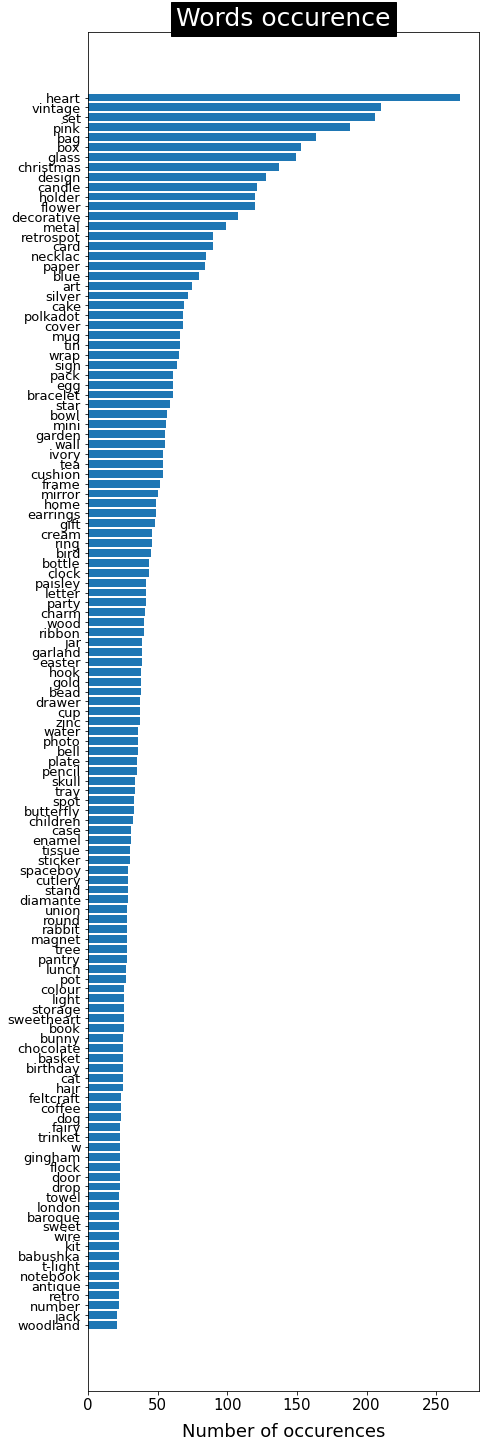

In [58]:
# representation of the most common keywords:

liste = sorted(list_products, key = lambda x:x[1], reverse = True)

plt.rc('font', weight='normal')
fig, ax = plt.subplots(figsize=(7, 25))
y_axis = [i[1] for i in liste[:125]]
x_axis = [k for k,i in enumerate(liste[:125])]
x_label = [i[0] for i in liste[:125]]
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 13)
plt.yticks(x_axis, x_label)
plt.xlabel("Number of occurences", fontsize = 18, labelpad = 10)
ax.barh(x_axis, y_axis, align = 'center')
ax = plt.gca()
ax.invert_yaxis()

plt.title("Words occurence",bbox={'facecolor':'k', 'pad':5}, color='w',fontsize = 25)
plt.show()

In [59]:
#  Removing useless words from the analysis and considering only the words that appear more than 13 times.

list_products = []
for k,v in count_keywords.items():
    word = keywords_select[k]
    if word in ['pink', 'blue', 'tag', 'green', 'orange']: continue
    if len(word) < 3 or v < 13: continue
    if ('+' in word) or ('/' in word): continue
    list_products.append([word, v])
 
list_products.sort(key = lambda x:x[1], reverse = True)
print('Preserved words:', len(list_products))

Preserved words: 191


In [62]:
list_products[:5]

[['heart', 267], ['vintage', 210], ['set', 206], ['bag', 164], ['box', 153]]

In [65]:
liste_produits = df['Description'].unique()
liste_produits

#print(liste_produits[0:2])
X = pd.DataFrame()
for key, occurence in list_products:
    X.loc[:, key] = list(map(lambda x:int(key.upper() in x), liste_produits))
#print(X[0:1])

In [66]:
#The  𝑋  matrix indicates the words contained in the description of the products using the one-hot-encoding principle.

In [70]:
threshold = [0, 1, 2, 3, 5, 10]
label_col = []
for i in range(len(threshold)):
    if i == len(threshold)-1:
        col = '.>{}'.format(threshold[i])
    else:
        col = '{}<.<{}'.format(threshold[i],threshold[i+1])
    #print(i)
    #print(col)
    label_col.append(col)
    X.loc[:, col] = 0

for i, prod in enumerate(liste_produits):
    prix = df[ df['Description'] == prod]['Unit_Price'].mean()
    #print (prix)
    j = 0
    while prix > threshold[j]:
        j+=1
        if j == len(threshold): break
    X.loc[i, label_col[j-1]] = 1

In [71]:
# and to choose the appropriate ranges, checking the number of products in the different groups:

print("{:<8} {:<20} \n".format('range', 'number of products') + 20*'-')
for i in range(len(threshold)):
    if i == len(threshold)-1:
        col = '.>{}'.format(threshold[i])
    else:
        col = '{}<.<{}'.format(threshold[i],threshold[i+1])    
    print("{:<10}  {:<20}".format(col, X.loc[:, col].sum()))

range    number of products   
--------------------
0<.<1       964                 
1<.<2       1009                
2<.<3       673                 
3<.<5       608                 
5<.<10      468                 
.>10        156                 


In [80]:
X

,heart,vintage,set,bag,box,glass,christmas,design,candle,holder,...,craft,lace,wallet,point,0<.<1,1<.<2,2<.<3,3<.<5,5<.<10,.>10
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3873,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3874,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3875,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3876,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


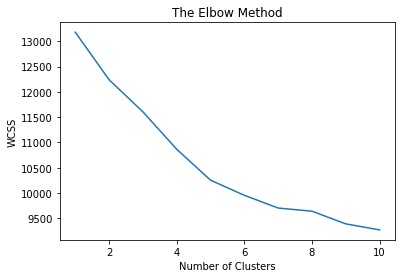

In [81]:
# clusters of products

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init ='k-means++' , max_iter=300 , n_init = 10, random_state = 0 )
    kmeans.fit (X)
    
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### From the above Elbow Method Plot, we see that beyond 5 clusters, some clusters contained very few elements, therefore  we will go with 5 clusters

In [95]:

n_clusters = 5
kmeans  = KMeans(n_clusters = 5, init ='k-means++' , max_iter=300 , n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)



In [96]:
pd.Series(y_kmeans).value_counts()

2    1009
3     964
4     764
1     673
0     468
dtype: int64

### Now we can have a look at the type of objects that each cluster represents. 
### determining which keywords are the most frequent in each of them

In [101]:
liste = pd.DataFrame(liste_produits)
liste

,0
0,WHITE HANGING HEART T-LIGHT HOLDER
1,WHITE METAL LANTERN
2,CREAM CUPID HEARTS COAT HANGER
3,KNITTED UNION FLAG HOT WATER BOTTLE
4,RED WOOLLY HOTTIE WHITE HEART.
...,...
3873,"LETTER ""W"" BLING KEY RING"
3874,"LETTER ""Z"" BLING KEY RING"
3875,PINK CRYSTAL SKULL PHONE CHARM
3876,CREAM HANGING HEART T-LIGHT HOLDER


In [124]:
n_clusters = 5
liste = pd.DataFrame(liste_produits)
liste_words = [word for (word, occurence) in list_products]

occurence = [dict() for _ in range(n_clusters)]

for i in range(n_clusters):
    liste_cluster = liste.loc[y_kmeans == i]
    for word in liste_words:
        if word in ['art', 'set', 'heart', 'pink', 'blue', 'tag']: continue
        occurence[i][word] = sum(liste_cluster.loc[:, 0].str.contains(word.upper()))

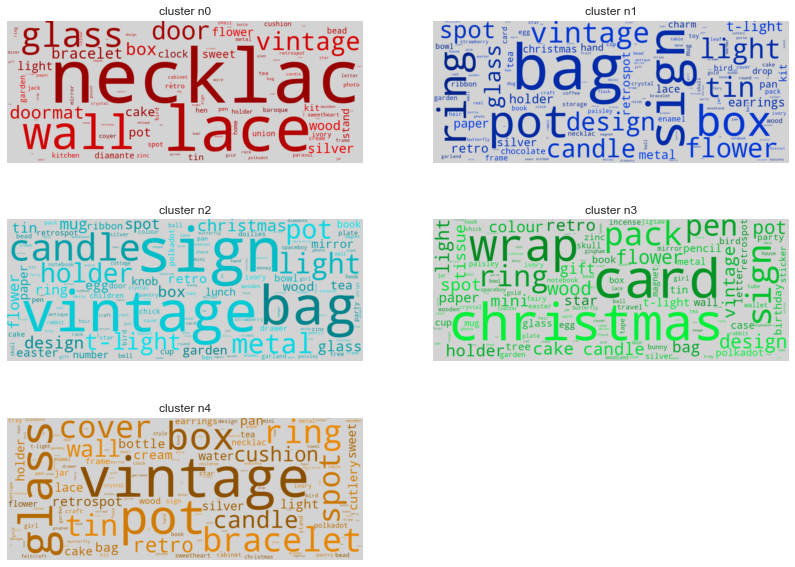

In [125]:
from wordcloud import WordCloud

def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

def make_wordcloud(liste, increment):
    ax1 = fig.add_subplot(4,2,increment)
    words = dict()
    trunc_occurences = liste[0:150]
    for s in trunc_occurences:
        words[s[0]] = s[1]
    
    wordcloud = WordCloud(width=1000,height=400, background_color='lightgrey', 
                          max_words=1628,relative_scaling=1,
                          color_func = random_color_func,
                          normalize_plurals=False)
    wordcloud.generate_from_frequencies(words)
    ax1.imshow(wordcloud, interpolation="bilinear")
    ax1.axis('off')
    plt.title('cluster n{}'.format(increment-1))

fig = plt.figure(1, figsize=(14,14))
color = [0, 160, 130, 95, 280, 40, 330, 110, 25]
for i in range(n_clusters):
    list_cluster_occurences = occurence[i]

    tone = color[i] # define the color of the words
    liste = []
    for key, value in list_cluster_occurences.items():
        liste.append([key, value])
    liste.sort(key = lambda x:x[1], reverse = True)
    make_wordcloud(liste, i+1)   

From this representation, we can see that for example, one of the clusters contains objects that could be associated with gifts (keywords: Christmas, packaging, card, ...). Another cluster would rather contain luxury items and jewelry (keywords: necklace, bracelet, lace, silver, ...). Nevertheless, it can also be observed that many words appear in various clusters and it is therefore difficult to clearly distinguish them.

In order to ensure that these clusters are truly distinct, I look at their composition. Given the large number of variables of the initial matrix, I first perform a PCA:

In [111]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
pca_samples = pca.transform(X)

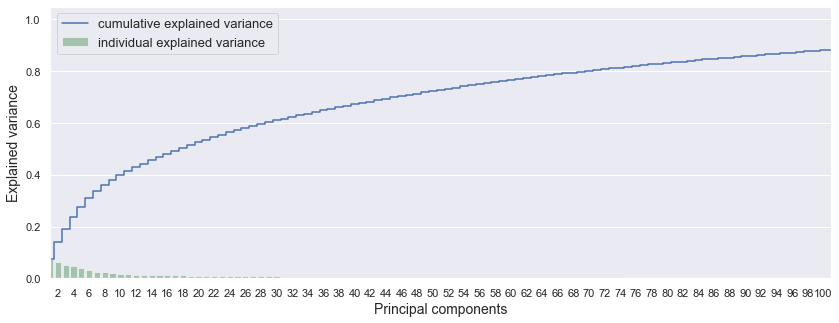

In [113]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.set(font_scale=1)
plt.step(range(X.shape[1]), pca.explained_variance_ratio_.cumsum(), where='mid',
         label='cumulative explained variance')
sns.barplot(np.arange(1,X.shape[1]+1), pca.explained_variance_ratio_, alpha=0.5, color = 'g',
            label='individual explained variance')
plt.xlim(0, 100)

ax.set_xticklabels([s if int(s.get_text())%2 == 0 else '' for s in ax.get_xticklabels()])

plt.ylabel('Explained variance', fontsize = 14)
plt.xlabel('Principal components', fontsize = 14)
plt.legend(loc='upper left', fontsize = 13);

In [114]:
### We see that the number of components required to explain the data is extremely important: 
# we need more than 100 components to explain 90% of the variance of the data.
#keeping only limited number of components since this decomposition is only performed 
#to visualize the data:

In [117]:
pca = PCA(n_components=50)
matrix_9D = pca.fit_transform(X)
mat = pd.DataFrame(matrix_9D)
mat['cluster'] = pd.Series(y_kmeans)

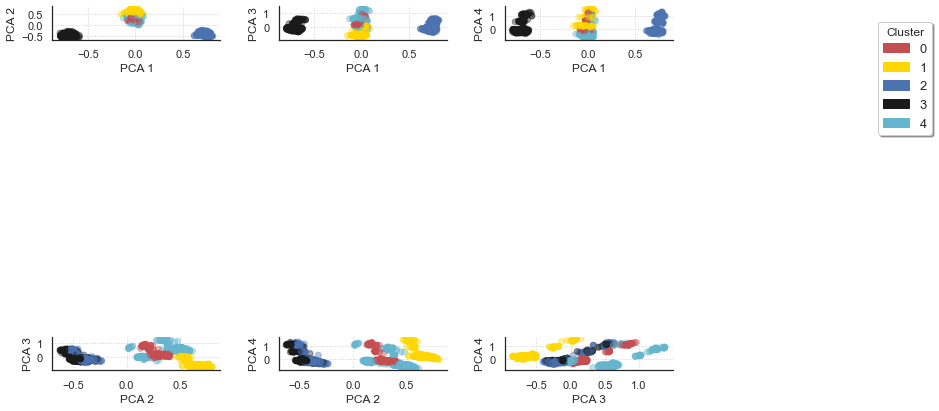

In [118]:
import matplotlib.patches as mpatches

sns.set_style("white")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})

LABEL_COLOR_MAP = {0:'r', 1:'gold', 2:'b', 3:'k', 4:'c', 5:'g'}
label_color = [LABEL_COLOR_MAP[l] for l in mat['cluster']]

fig = plt.figure(figsize = (12,10))
increment = 0
for ix in range(4):
    for iy in range(ix+1, 4):    
        increment += 1
        ax = fig.add_subplot(3,3,increment)
        ax.scatter(mat[ix], mat[iy], c= label_color, alpha=0.4) 
        plt.ylabel('PCA {}'.format(iy+1), fontsize = 12)
        plt.xlabel('PCA {}'.format(ix+1), fontsize = 12)
        ax.yaxis.grid(color='lightgray', linestyle=':')
        ax.xaxis.grid(color='lightgray', linestyle=':')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
        if increment == 9: break
    if increment == 9: break
        

comp_handler = []
for i in range(5):
    comp_handler.append(mpatches.Patch(color = LABEL_COLOR_MAP[i], label = i))

plt.legend(handles=comp_handler, bbox_to_anchor=(1.1, 0.97), 
           title='Cluster',
           shadow = True, frameon = True, framealpha = 1,fontsize = 13, 
           bbox_transform = plt.gcf().transFigure) #facecolor = 'lightgrey',

plt.tight_layout()